In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/ak261.1/Desktop/final-year-heat-exchanger/synthetic_heat_exchanger_data_expanded.csv')


# View basic information about the dataset
data.info()

# Show a few rows of the dataset to understand its structure
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   inlet_temperature       100 non-null    float64
 1   outlet_temperature      100 non-null    float64
 2   flow_rate               100 non-null    float64
 3   pressure_drop           100 non-null    float64
 4   specific_heat_capacity  100 non-null    float64
 5   fouling_factor          100 non-null    float64
dtypes: float64(6)
memory usage: 4.8 KB


,inlet_temperature,outlet_temperature,flow_rate,pressure_drop,specific_heat_capacity,fouling_factor
0,154.981605,111.257167,109.260949,4.655045,4.18,0.115469
1,178.028572,135.456416,92.524199,6.094064,4.18,0.235383
2,169.279758,122.574239,94.848861,6.121905,4.18,0.175788
3,163.946339,130.342828,116.956626,6.412290,4.18,0.223969
4,146.240746,146.302659,108.192872,6.678274,4.18,0.148007


In [6]:
import numpy as np
from scipy import stats

# Detect and filter out outliers using Z-score
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
data_no_outliers = data[(z_scores < 3).all(axis=1)]

print(f"Data shape after removing outliers: {data_no_outliers.shape}")



Data shape after removing outliers: (0, 6)


In [7]:
# Adjust Z-score threshold to retain more data
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
data_no_outliers = data[(z_scores < 4).all(axis=1)]  # Increased threshold from 3 to 4

print(f"Data shape after removing outliers with adjusted threshold: {data_no_outliers.shape}")



Data shape after removing outliers with adjusted threshold: (0, 6)


In [8]:
# Outlier detection using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers using IQR
data_no_outliers = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Data shape after removing outliers using IQR: {data_no_outliers.shape}")



Data shape after removing outliers using IQR: (100, 6)


In [9]:
import numpy as np
from scipy import stats

# Detect and filter out outliers using Z-score
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
data_no_outliers = data[(z_scores < 3).all(axis=1)]

print(f"Data shape after removing outliers: {data_no_outliers.shape}")



Data shape after removing outliers: (0, 6)


In [10]:
# Feature Engineering
data_no_outliers['temp_diff'] = data_no_outliers['inlet_temperature'] - data_no_outliers['outlet_temperature']
data_no_outliers['heat_duty'] = (
    data_no_outliers['flow_rate'] * 
    data_no_outliers['specific_heat_capacity'] * 
    data_no_outliers['temp_diff']
)

print(data_no_outliers.head())


Empty DataFrame
Columns: [inlet_temperature, outlet_temperature, flow_rate, pressure_drop, specific_heat_capacity, fouling_factor, temp_diff, heat_duty]
Index: []


In [11]:
# Use the dataset cleaned using IQR method
# Feature Engineering
data_no_outliers['temp_diff'] = data_no_outliers['inlet_temperature'] - data_no_outliers['outlet_temperature']
data_no_outliers['heat_duty'] = (
    data_no_outliers['flow_rate'] * 
    data_no_outliers['specific_heat_capacity'] * 
    data_no_outliers['temp_diff']
)

print(data_no_outliers.head())


Empty DataFrame
Columns: [inlet_temperature, outlet_temperature, flow_rate, pressure_drop, specific_heat_capacity, fouling_factor, temp_diff, heat_duty]
Index: []


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define features and target variable
X = data_no_outliers.drop(columns=['fouling_factor'])
y = data_no_outliers['fouling_factor']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')


ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
# Step 1: Load the Dataset
import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/ak261.1/Desktop/final-year-heat-exchanger/synthetic_heat_exchanger_data_expanded.csv')

# View basic information about the dataset
print(data.info())

# Show a few rows of the dataset to understand its structure
print(data.head())

# Step 2: Feature Engineering
# Create new features: temperature difference and heat duty
data['temp_diff'] = data['inlet_temperature'] - data['outlet_temperature']
data['heat_duty'] = data['flow_rate'] * data['specific_heat_capacity'] * data['temp_diff']

print("\nData after feature engineering:")
print(data.head())

# Step 3: Model Development
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define features and target variable
X = data.drop(columns=['fouling_factor'])
y = data['fouling_factor']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nTraining set size: {X_train.shape}, Testing set size: {X_test.shape}")

# Step 4: Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'\nMean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

# Step 6: Summary of Results
print("\nModel training and evaluation completed successfully.")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   inlet_temperature       100 non-null    float64
 1   outlet_temperature      100 non-null    float64
 2   flow_rate               100 non-null    float64
 3   pressure_drop           100 non-null    float64
 4   specific_heat_capacity  100 non-null    float64
 5   fouling_factor          100 non-null    float64
dtypes: float64(6)
memory usage: 4.8 KB
None
   inlet_temperature  outlet_temperature   flow_rate  pressure_drop  \
0         154.981605          111.257167  109.260949       4.655045   
1         178.028572          135.456416   92.524199       6.094064   
2         169.279758          122.574239   94.848861       6.121905   
3         163.946339          130.342828  116.956626       6.412290   
4         146.240746          146.302659  108.192872       6.678274   

 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   inlet_temperature       100 non-null    float64
 1   outlet_temperature      100 non-null    float64
 2   flow_rate               100 non-null    float64
 3   pressure_drop           100 non-null    float64
 4   specific_heat_capacity  100 non-null    float64
 5   fouling_factor          100 non-null    float64
dtypes: float64(6)
memory usage: 4.8 KB
None
   inlet_temperature  outlet_temperature   flow_rate  pressure_drop  \
0         154.981605          111.257167  109.260949       4.655045   
1         178.028572          135.456416   92.524199       6.094064   
2         169.279758          122.574239   94.848861       6.121905   
3         163.946339          130.342828  116.956626       6.412290   
4         146.240746          146.302659  108.192872       6.678274   

 

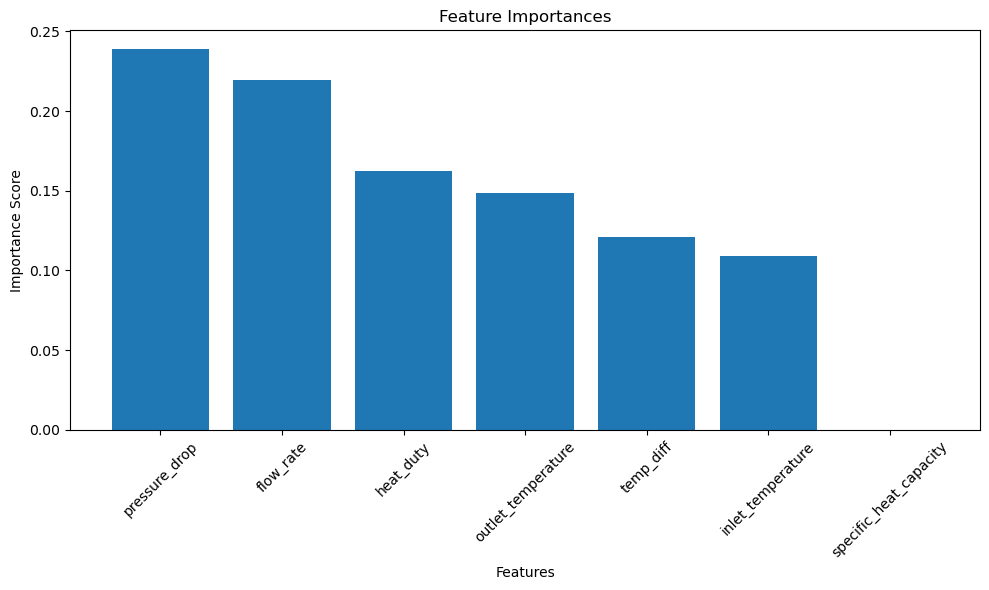

In [ ]:
# Step 1: Load the Dataset
import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/ak261.1/Desktop/final-year-heat-exchanger/synthetic_heat_exchanger_data_expanded.csv')

# View basic information about the dataset
print(data.info())

# Show a few rows of the dataset to understand its structure
print(data.head())

# Step 2: Feature Engineering
# Create new features: temperature difference and heat duty
data['temp_diff'] = data['inlet_temperature'] - data['outlet_temperature']
data['heat_duty'] = data['flow_rate'] * data['specific_heat_capacity'] * data['temp_diff']

print("\nData after feature engineering:")
print(data.head())

# Step 3: Model Development
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Define features and target variable
X = data.drop(columns=['fouling_factor'])
y = data['fouling_factor']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nTraining set size: {X_train.shape}, Testing set size: {X_test.shape}")

# Step 4: Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'\nMean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

# Step 6: Visualize Feature Importances
feature_importances = model.feature_importances_
features = X.columns

# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   inlet_temperature       100 non-null    float64
 1   outlet_temperature      100 non-null    float64
 2   flow_rate               100 non-null    float64
 3   pressure_drop           100 non-null    float64
 4   specific_heat_capacity  100 non-null    float64
 5   fouling_factor          100 non-null    float64
dtypes: float64(6)
memory usage: 4.8 KB
None
   inlet_temperature  outlet_temperature   flow_rate  pressure_drop  \
0         154.981605          111.257167  109.260949       4.655045   
1         178.028572          135.456416   92.524199       6.094064   
2         169.279758          122.574239   94.848861       6.121905   
3         163.946339          130.342828  116.956626       6.412290   
4         146.240746          146.302659  108.192872       6.678274   

 

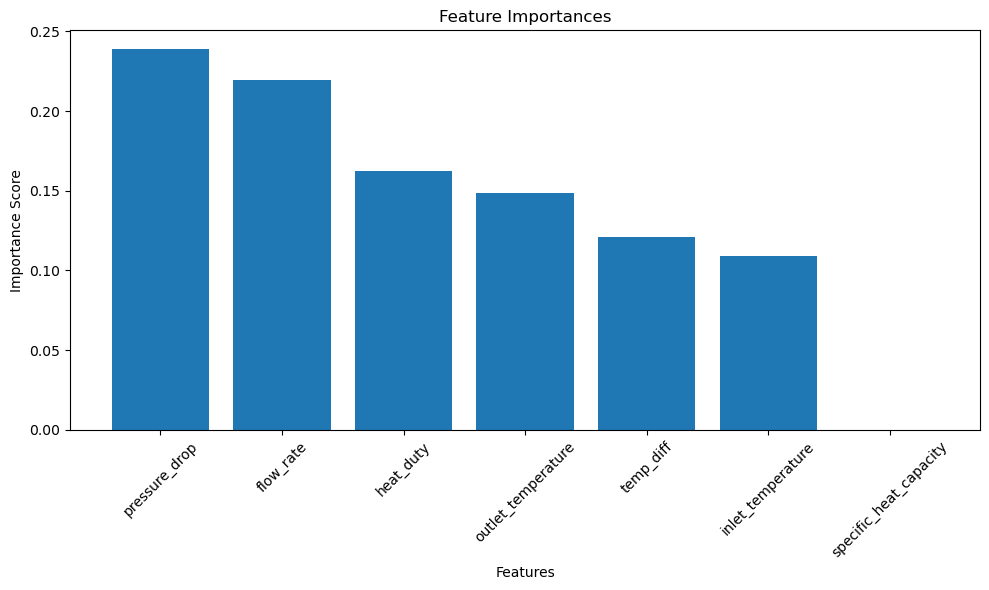

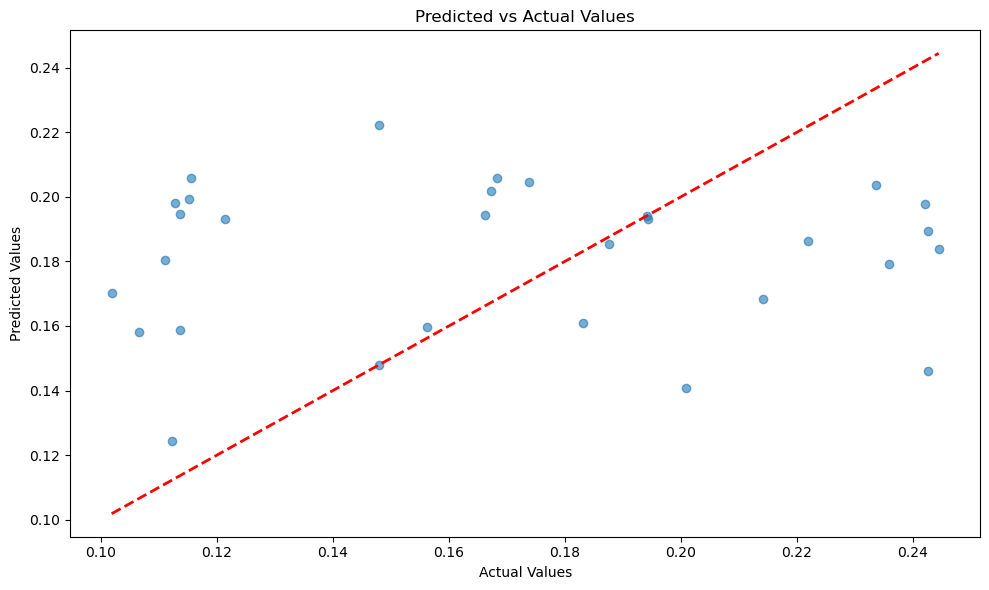

In [ ]:
# Step 1: Load the Dataset
import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/ak261.1/Desktop/final-year-heat-exchanger/synthetic_heat_exchanger_data_expanded.csv')

# View basic information about the dataset
print(data.info())

# Show a few rows of the dataset to understand its structure
print(data.head())

# Step 2: Feature Engineering
# Create new features: temperature difference and heat duty
data['temp_diff'] = data['inlet_temperature'] - data['outlet_temperature']
data['heat_duty'] = data['flow_rate'] * data['specific_heat_capacity'] * data['temp_diff']

print("\nData after feature engineering:")
print(data.head())

# Step 3: Model Development
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Define features and target variable
X = data.drop(columns=['fouling_factor'])
y = data['fouling_factor']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nTraining set size: {X_train.shape}, Testing set size: {X_test.shape}")

# Step 4: Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'\nMean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

# Step 6: Visualize Feature Importances
feature_importances = model.feature_importances_
features = X.columns

# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# Step 7: Plot Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.tight_layout()
plt.show()



/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


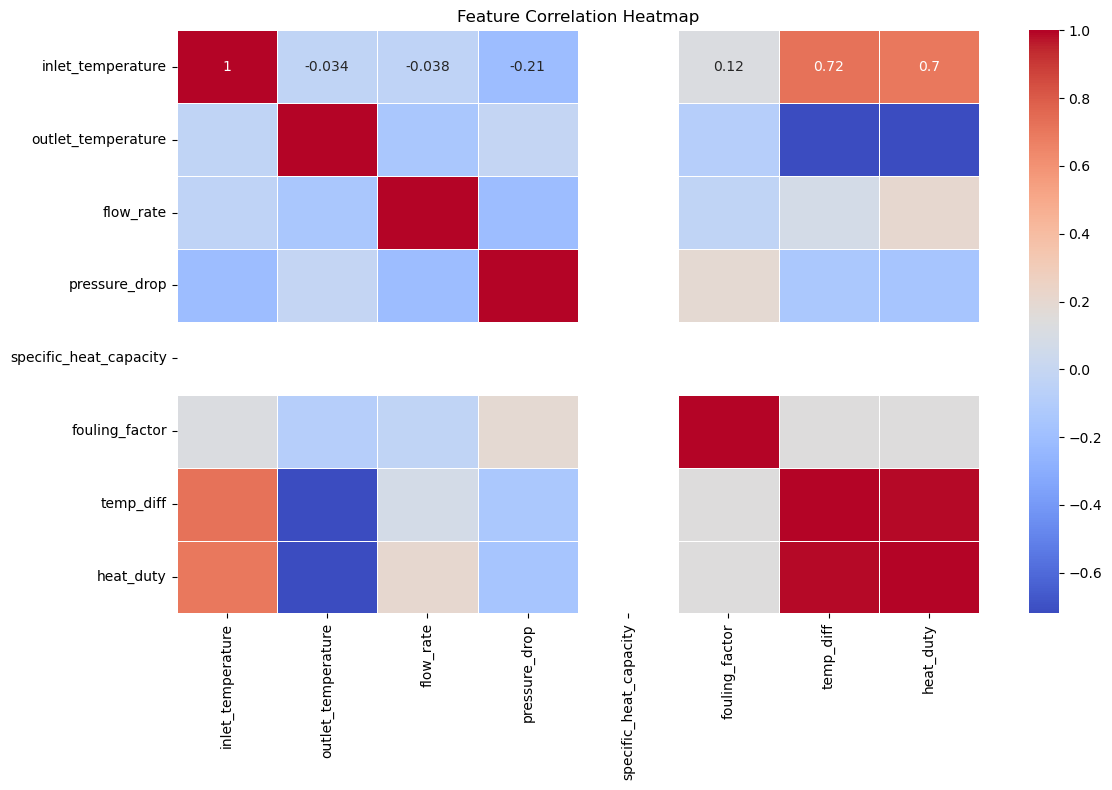

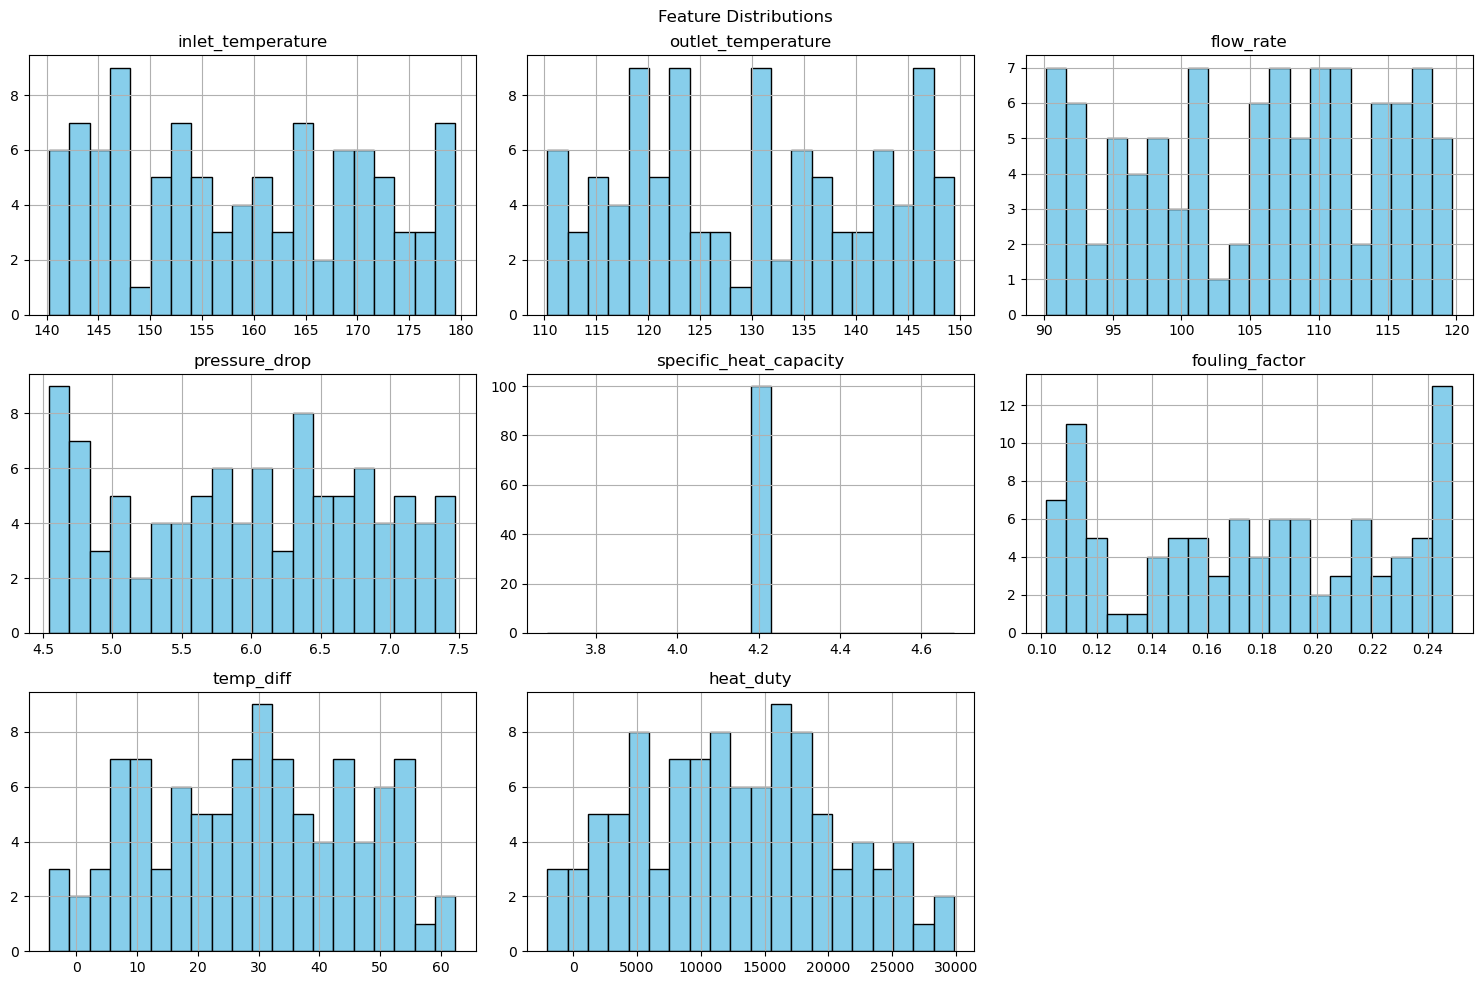

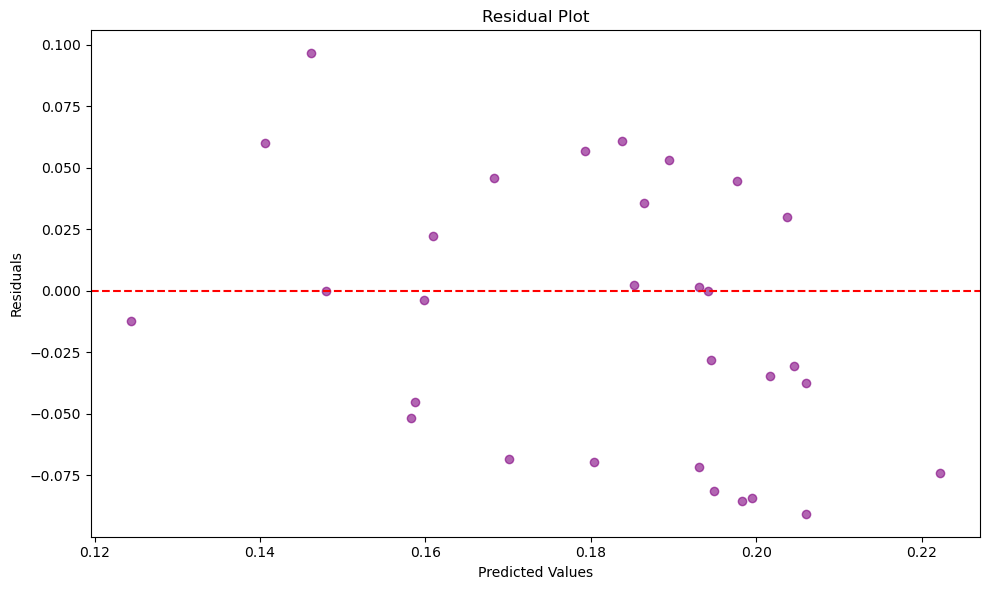

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

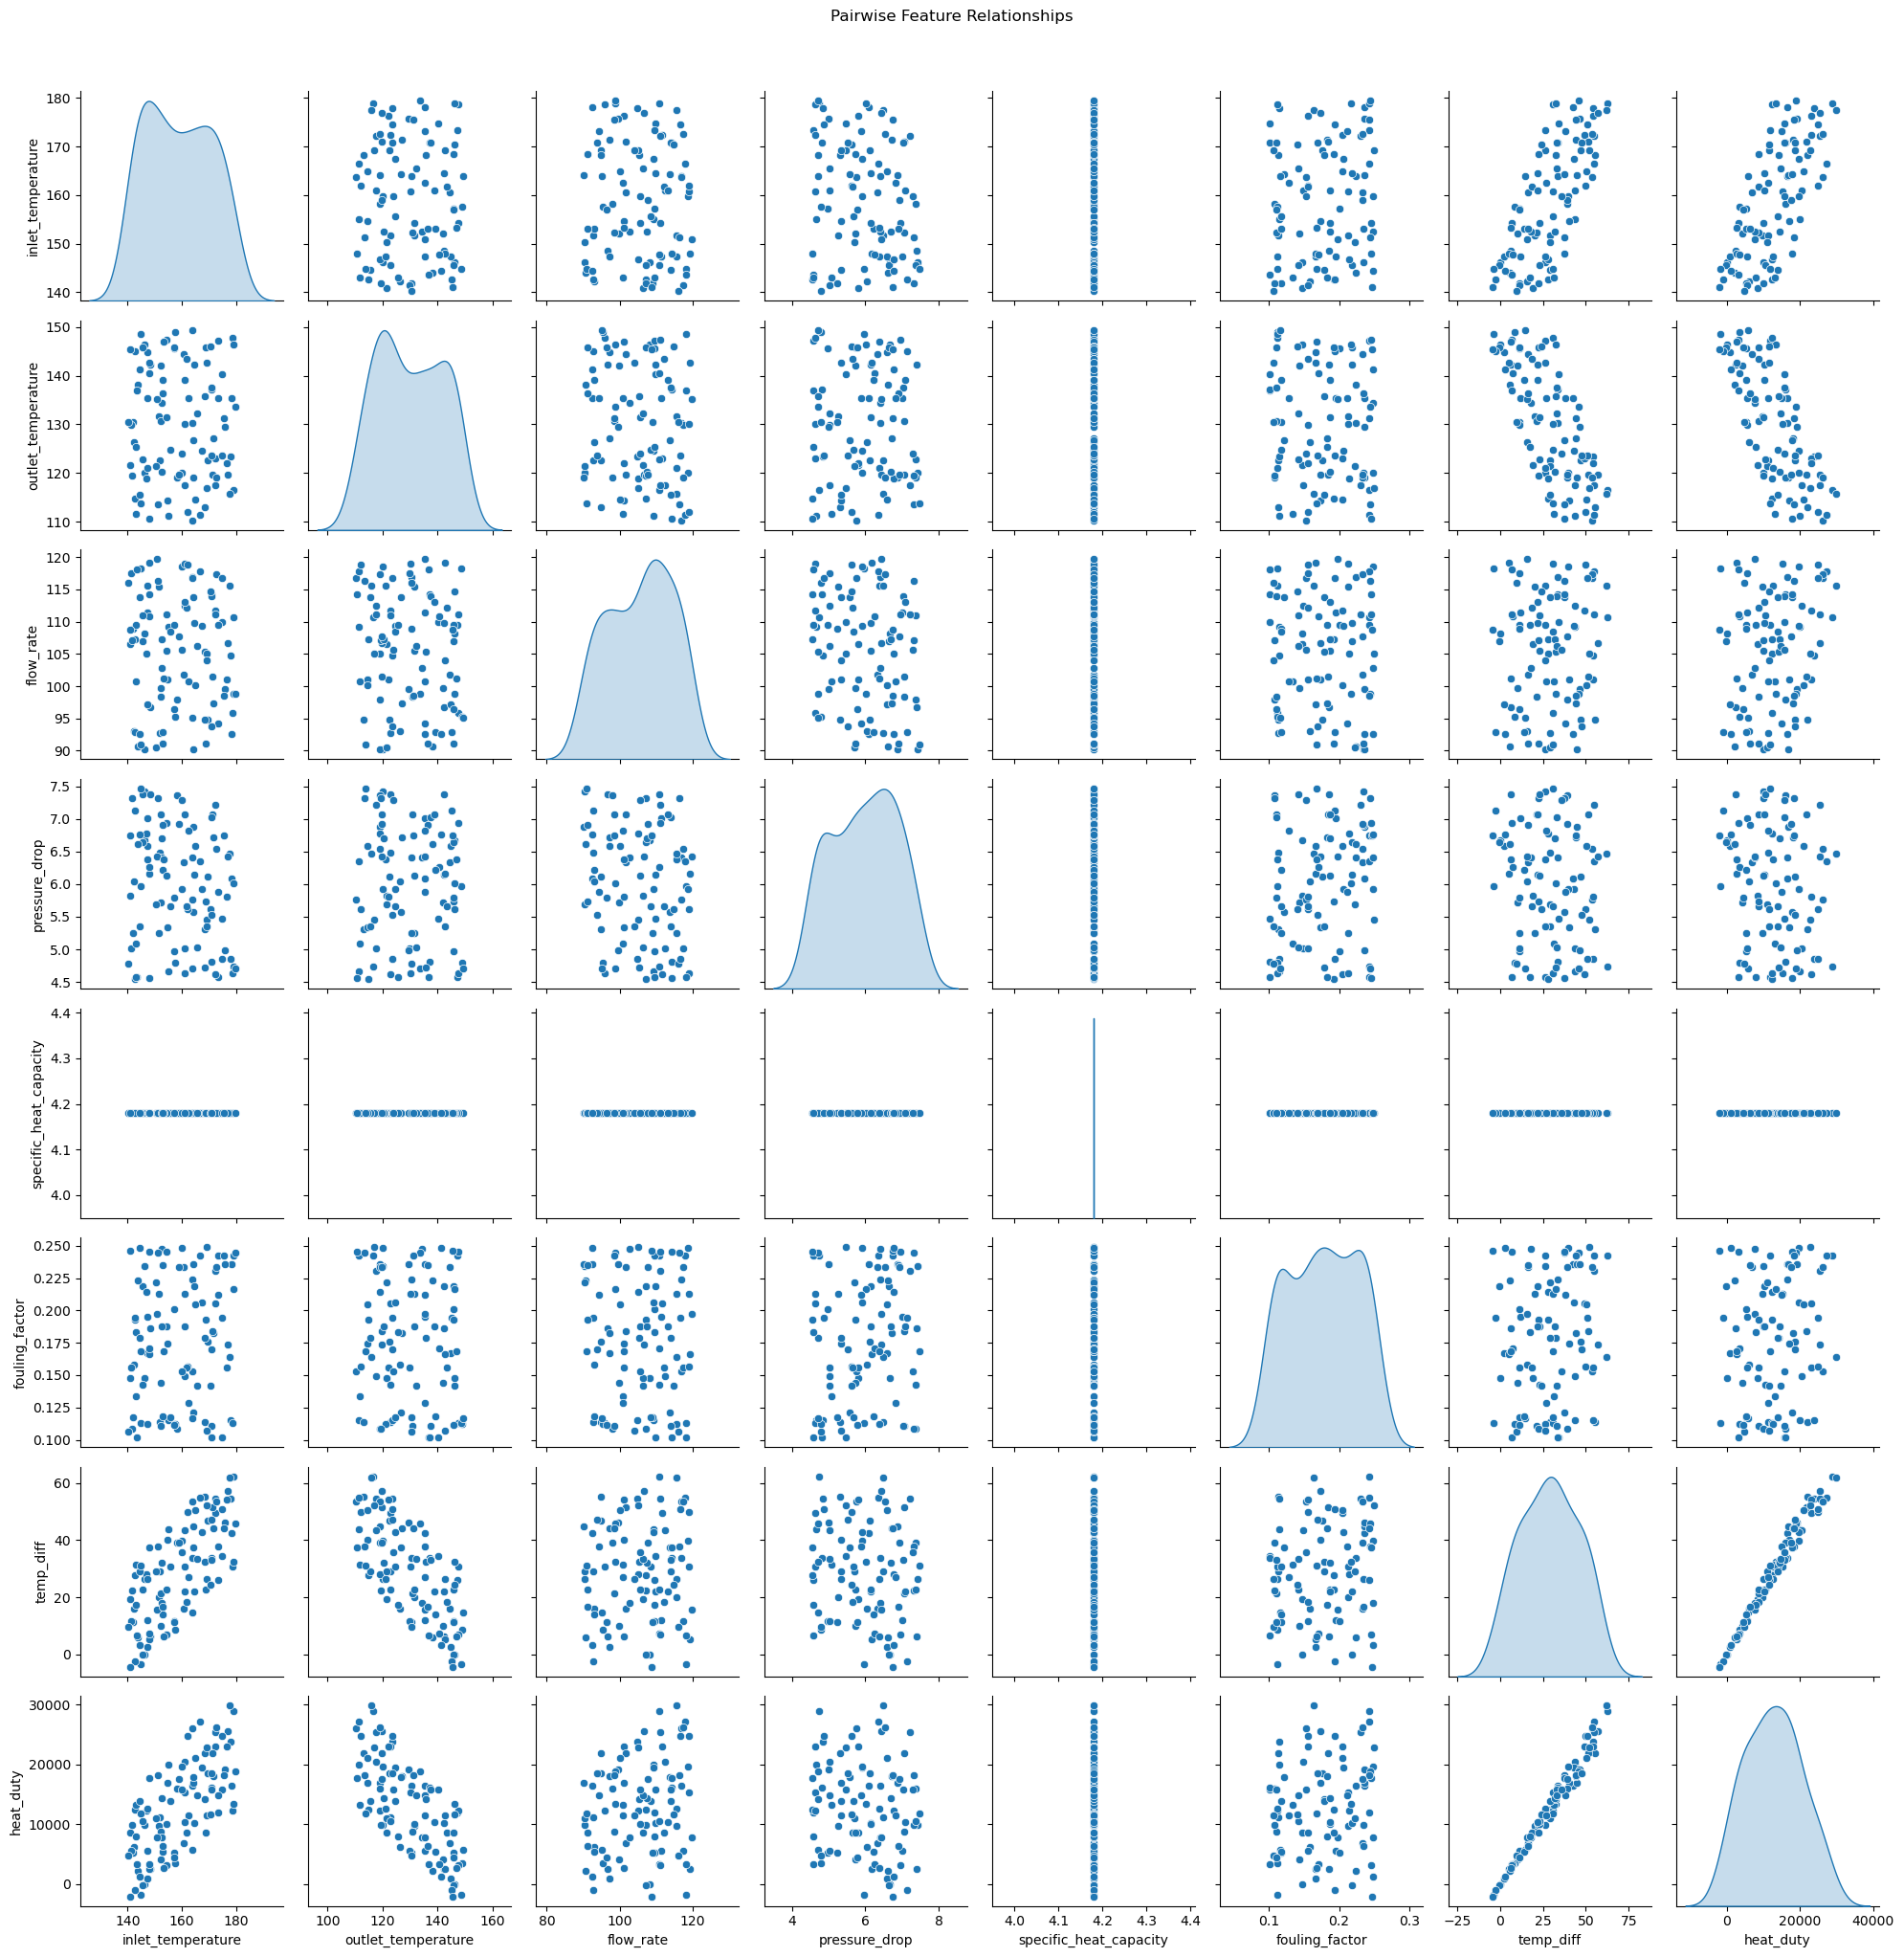

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


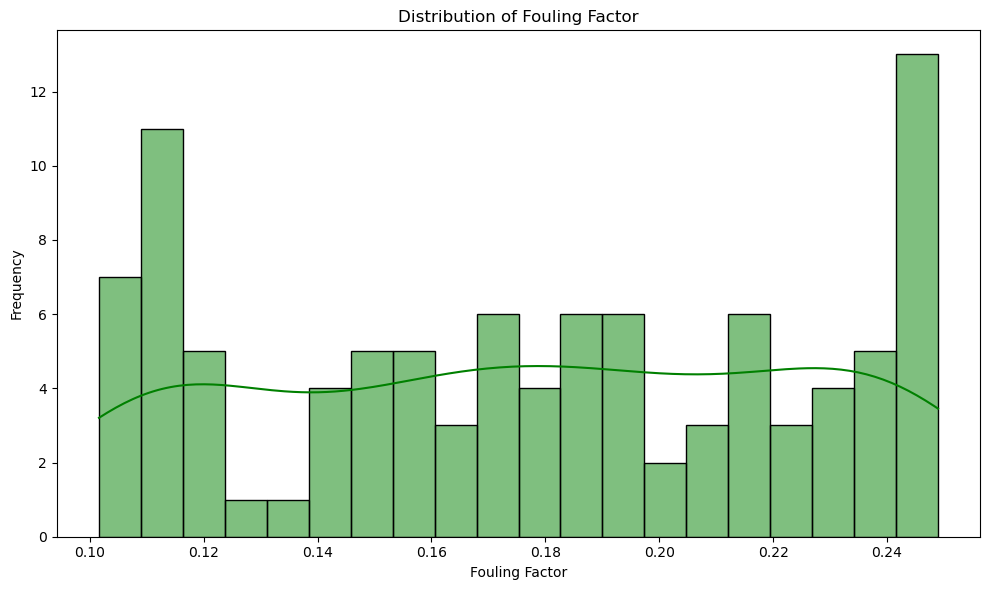

In [ ]:
import seaborn as sns

# Step 1: Feature Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Step 2: Feature Distributions
data.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()

# Step 3: Residual Plot
# Residuals = Actual - Predicted
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

# Step 4: Pair Plot
# Sampling a small subset if the data is large
sns.pairplot(data, diag_kind='kde')
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.tight_layout()
plt.show()

# Step 5: Distribution of Fouling Factor
plt.figure(figsize=(10, 6))
sns.histplot(data['fouling_factor'], kde=True, bins=20, color='green')
plt.title('Distribution of Fouling Factor')
plt.xlabel('Fouling Factor')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


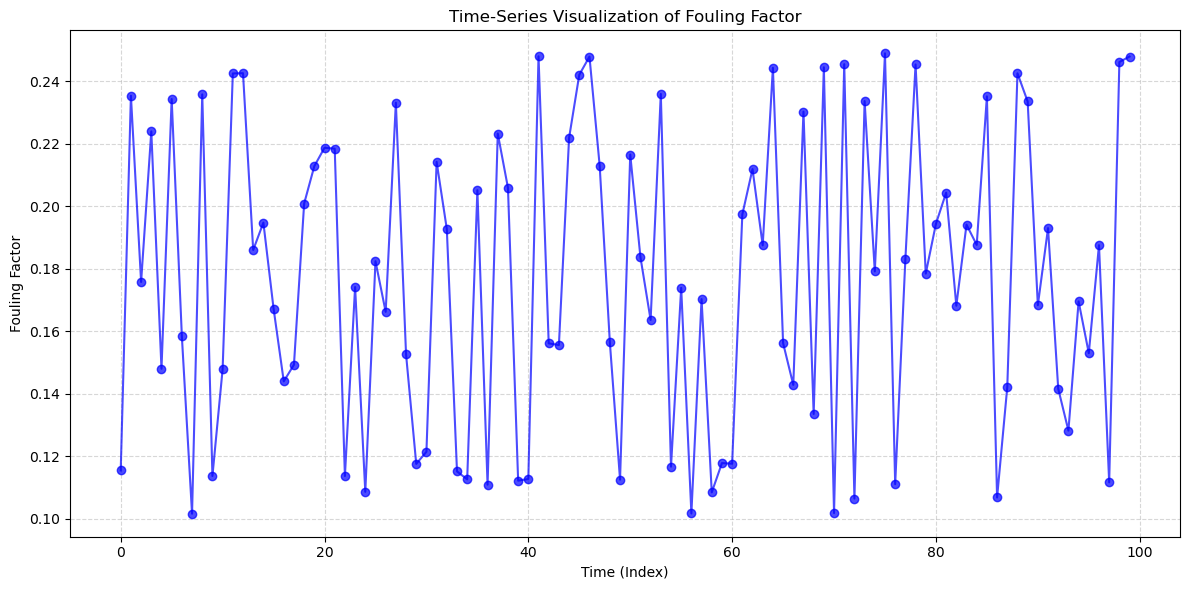

In [ ]:
# Step 6: Time-Series Visualization of Fouling Factor
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['fouling_factor'], marker='o', linestyle='-', color='blue', alpha=0.7)
plt.xlabel('Time (Index)')
plt.ylabel('Fouling Factor')
plt.title('Time-Series Visualization of Fouling Factor')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


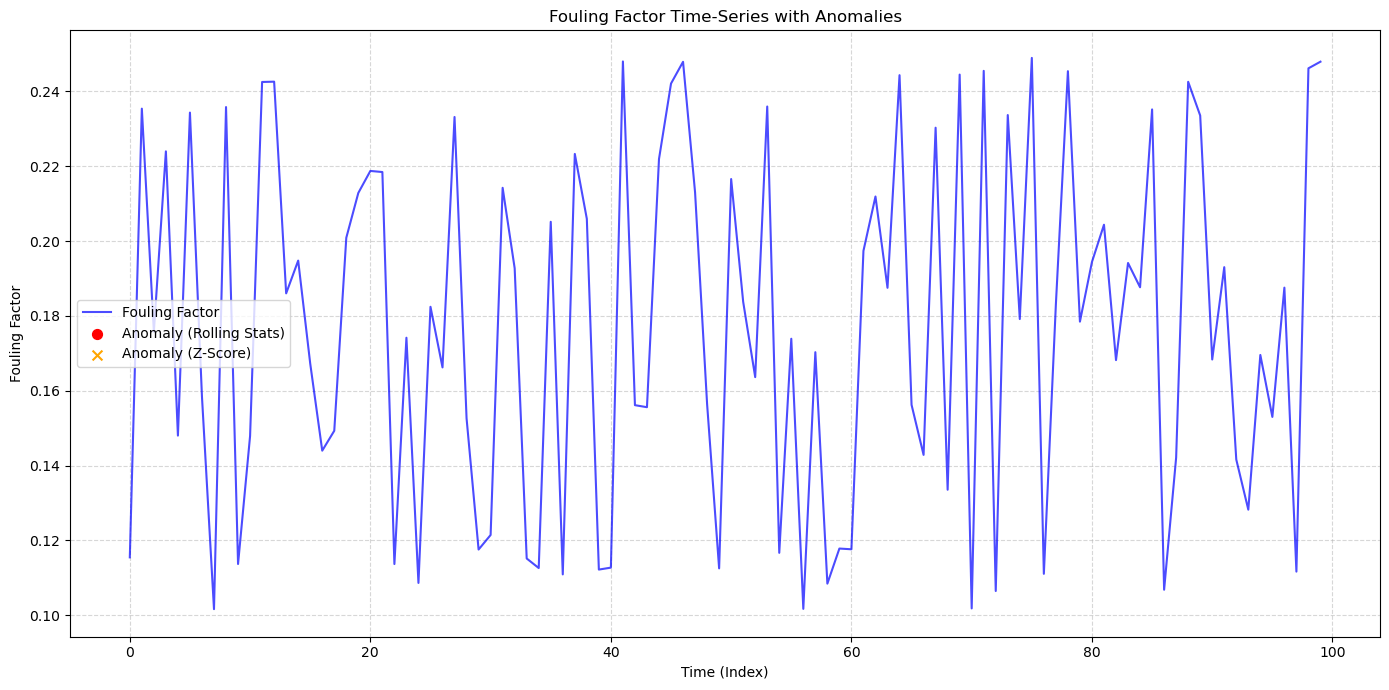

In [ ]:
import numpy as np

# Step 7: Anomaly Detection Using Rolling Statistics
# Calculate rolling mean and standard deviation
window_size = 5  # Size of the moving window
data['rolling_mean'] = data['fouling_factor'].rolling(window=window_size).mean()
data['rolling_std'] = data['fouling_factor'].rolling(window=window_size).std()

# Set threshold to define an anomaly as fouling_factor deviating by more than 2 rolling standard deviations
data['anomaly_rolling'] = np.abs(data['fouling_factor'] - data['rolling_mean']) > (2 * data['rolling_std'])

# Step 8: Anomaly Detection Using Z-Score
# Calculate Z-score to identify anomalies
mean_fouling = data['fouling_factor'].mean()
std_fouling = data['fouling_factor'].std()
data['z_score'] = (data['fouling_factor'] - mean_fouling) / std_fouling

# Flag as anomaly if Z-score > threshold (e.g., 2)
z_score_threshold = 2
data['anomaly_z_score'] = np.abs(data['z_score']) > z_score_threshold

# Step 9: Visualization of Anomalies
plt.figure(figsize=(14, 7))

# Plot the original fouling factor time series
plt.plot(data.index, data['fouling_factor'], color='blue', label='Fouling Factor', alpha=0.7)

# Highlight anomalies detected using Rolling Statistics
plt.scatter(data.index[data['anomaly_rolling']], 
            data['fouling_factor'][data['anomaly_rolling']], 
            color='red', label='Anomaly (Rolling Stats)', s=50)

# Highlight anomalies detected using Z-Score Method
plt.scatter(data.index[data['anomaly_z_score']], 
            data['fouling_factor'][data['anomaly_z_score']], 
            color='orange', marker='x', label='Anomaly (Z-Score)', s=50)

plt.xlabel('Time (Index)')
plt.ylabel('Fouling Factor')
plt.title('Fouling Factor Time-Series with Anomalies')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


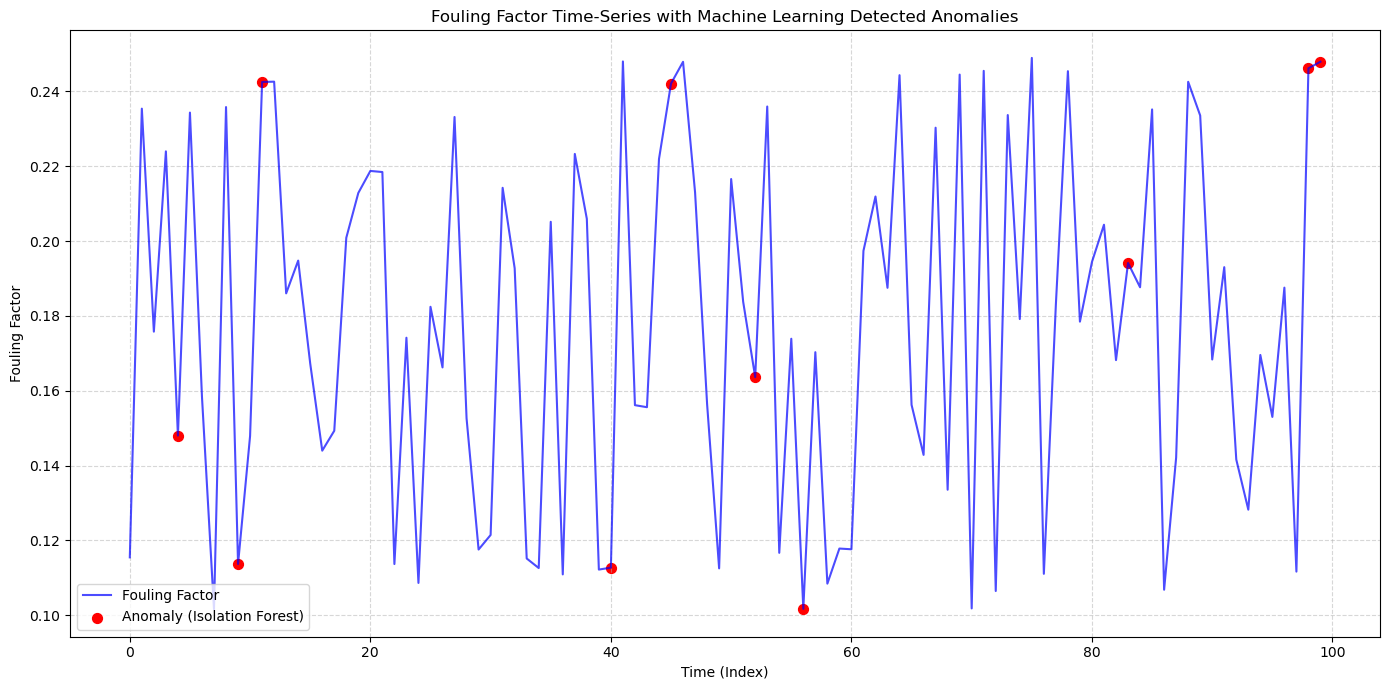

In [ ]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Step 1: Prepare the Data for Anomaly Detection
# We will focus on the fouling factor, but also use features that might influence it, like temp_diff, heat_duty, etc.
features_for_anomaly_detection = ['fouling_factor', 'temp_diff', 'heat_duty']

# Extracting features for anomaly detection
X_anomaly = data[features_for_anomaly_detection].dropna()

# Step 2: Train Isolation Forest Model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
data['anomaly_iforest'] = isolation_forest.fit_predict(X_anomaly)

# IsolationForest returns 1 for normal data and -1 for anomalies
data['anomaly_iforest'] = data['anomaly_iforest'].replace({1: 0, -1: 1})  # Convert to binary (0: normal, 1: anomaly)

# Step 3: Visualization of Anomalies Detected by Isolation Forest
plt.figure(figsize=(14, 7))

# Plot the original fouling factor time series
plt.plot(data.index, data['fouling_factor'], color='blue', label='Fouling Factor', alpha=0.7)

# Highlight anomalies detected by Isolation Forest
plt.scatter(data.index[data['anomaly_iforest'] == 1], 
            data['fouling_factor'][data['anomaly_iforest'] == 1], 
            color='red', label='Anomaly (Isolation Forest)', s=50)

plt.xlabel('Time (Index)')
plt.ylabel('Fouling Factor')
plt.title('Fouling Factor Time-Series with Machine Learning Detected Anomalies')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


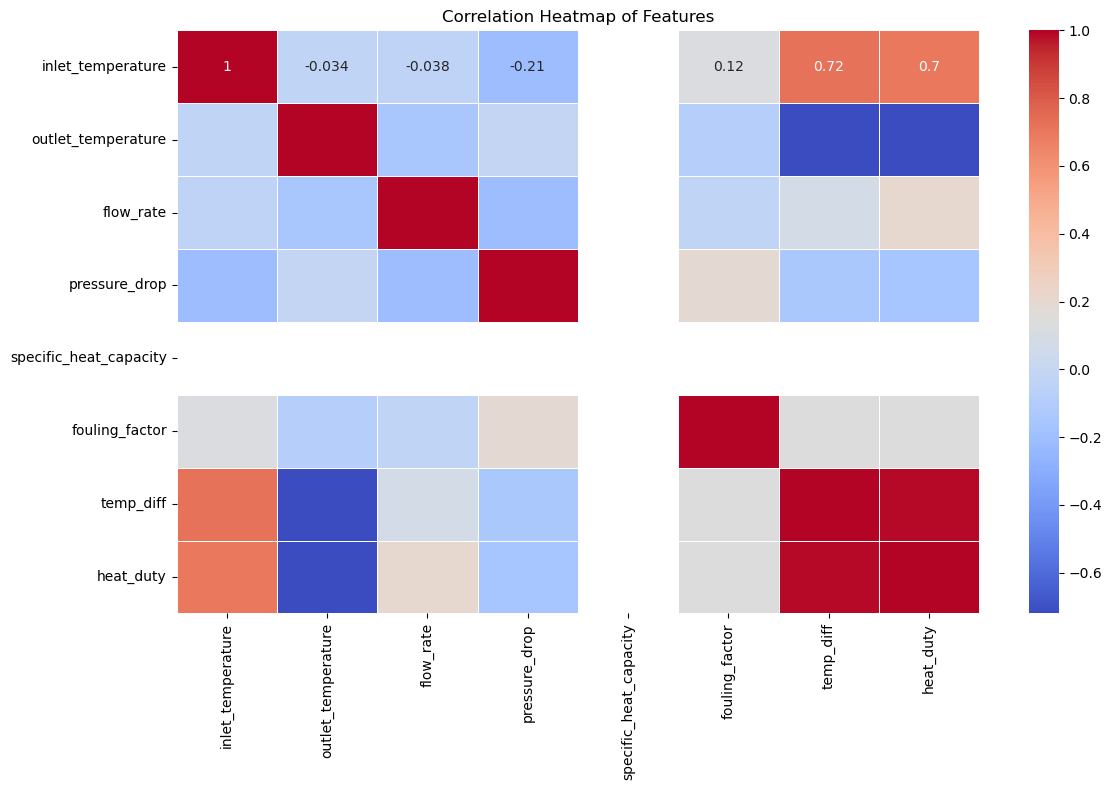


Feature Ranking (1 indicates selected features):
inlet_temperature: Rank 1
outlet_temperature: Rank 1
flow_rate: Rank 1
pressure_drop: Rank 1
specific_heat_capacity: Rank 3
temp_diff: Rank 2
heat_duty: Rank 1

Selected Features for Modeling: ['inlet_temperature', 'outlet_temperature', 'flow_rate', 'pressure_drop', 'heat_duty']

Mean Absolute Error (Using Selected Features): 0.05
R-squared (Using Selected Features): -0.24


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv('/Users/ak261.1/Desktop/final-year-heat-exchanger/synthetic_heat_exchanger_data_expanded.csv')

# Step 2: Feature Engineering (if not already done)
# Create new features: temperature difference and heat duty
data['temp_diff'] = data['inlet_temperature'] - data['outlet_temperature']
data['heat_duty'] = data['flow_rate'] * data['specific_heat_capacity'] * data['temp_diff']

# Define features and target variable
X = data.drop(columns=['fouling_factor'])
y = data['fouling_factor']

# Step 3: Correlation-Based Feature Selection
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

# Based on the heatmap, you can decide which features are highly correlated and consider dropping them.

# Step 4: Recursive Feature Elimination (RFE)
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize RandomForestRegressor for feature selection
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize RFE with the RandomForestRegressor model
rfe = RFE(estimator=model, n_features_to_select=5)  # Select the top 5 features
rfe.fit(X_train, y_train)

# Get the ranking of features
feature_ranking = rfe.ranking_
selected_features = X.columns[rfe.support_]

print("\nFeature Ranking (1 indicates selected features):")
for feature, rank in zip(X.columns, feature_ranking):
    print(f"{feature}: Rank {rank}")

print(f"\nSelected Features for Modeling: {list(selected_features)}")

# Step 5: Train the Model with Selected Features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the model using the selected features
model.fit(X_train_selected, y_train)

# Make predictions and evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test_selected)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Absolute Error (Using Selected Features): {mae:.2f}')
print(f'R-squared (Using Selected Features): {r2:.2f}')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report
import numpy as np

# Step 1: Load the dataset
data = pd.read_csv('/Users/ak261.1/Desktop/final-year-heat-exchanger/synthetic_heat_exchanger_data_expanded.csv')

# Step 2: Feature Engineering (if not already done)
data['temp_diff'] = data['inlet_temperature'] - data['outlet_temperature']
data['heat_duty'] = data['flow_rate'] * data['specific_heat_capacity'] * data['temp_diff']

# Define features and target for regression
X = data.drop(columns=['fouling_factor'])
y = data['fouling_factor']

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Regression Models

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
print("Linear Regression - MAE:", mean_absolute_error(y_test, y_pred_lin))
print("Linear Regression - R2 Score:", r2_score(y_test, y_pred_lin))

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
print("\nDecision Tree Regressor - MAE:", mean_absolute_error(y_test, y_pred_dt))
print("Decision Tree Regressor - R2 Score:", r2_score(y_test, y_pred_dt))

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
print("\nRandom Forest Regressor - MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest Regressor - R2 Score:", r2_score(y_test, y_pred_rf))

# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)
print("\nGradient Boosting Regressor - MAE:", mean_absolute_error(y_test, y_pred_gb))
print("Gradient Boosting Regressor - R2 Score:", r2_score(y_test, y_pred_gb))

# Step 5: Classification Problem
# Define classification labels based on fouling factor thresholds
# For simplicity: Healthy (fouling < 0.15), Fouled (0.15 <= fouling < 0.20), Malfunctioning (fouling >= 0.20)
conditions = []
for value in data['fouling_factor']:
    if value < 0.15:
        conditions.append('Healthy')
    elif 0.15 <= value < 0.20:
        conditions.append('Fouled')
    else:
        conditions.append('Malfunctioning')

# Add classification labels to the dataset
data['condition'] = conditions

# Define features and target for classification
X_class = data.drop(columns=['fouling_factor', 'condition'])
y_class = data['condition']

# Split data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# Train and Evaluate an SVM Classifier
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train_class, y_train_class)
y_pred_class = svm_clf.predict(X_test_class)

# Evaluation Metrics for Classification
print("\nClassification Report (SVM Classifier):")
print(classification_report(y_test_class, y_pred_class))
print("Accuracy Score (SVM Classifier):", accuracy_score(y_test_class, y_pred_class))


Linear Regression - MAE: 0.041275801071160835
Linear Regression - R2 Score: 0.05129141918095326

Decision Tree Regressor - MAE: 0.04871639106586775
Decision Tree Regressor - R2 Score: -0.7496169382550288

Random Forest Regressor - MAE: 0.04591630162368301
Random Forest Regressor - R2 Score: -0.22745804827073202

Gradient Boosting Regressor - MAE: 0.05197565177930364
Gradient Boosting Regressor - R2 Score: -0.44927973368480023

Classification Report (SVM Classifier):
                precision    recall  f1-score   support

        Fouled       0.29      0.56      0.38         9
       Healthy       0.50      0.33      0.40        12
Malfunctioning       0.20      0.11      0.14         9

      accuracy                           0.33        30
     macro avg       0.33      0.33      0.31        30
  weighted avg       0.35      0.33      0.32        30

Accuracy Score (SVM Classifier): 0.3333333333333333


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, r2_score, classification_report, accuracy_score

# Step 1: Load the Dataset
data = pd.read_csv('/Users/ak261.1/Desktop/final-year-heat-exchanger/synthetic_heat_exchanger_data_expanded.csv')

# Step 2: Feature Engineering
data['temp_diff'] = data['inlet_temperature'] - data['outlet_temperature']
data['heat_duty'] = data['flow_rate'] * data['specific_heat_capacity'] * data['temp_diff']

# Step 3: Define Features and Target for Regression
X = data.drop(columns=['fouling_factor'])
y = data['fouling_factor']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Hyperparameter Tuning for Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(estimator=rf_reg, param_grid=param_grid_rf, cv=3, n_jobs=-1, scoring='r2')
grid_search_rf.fit(X_train, y_train)

# Best Parameters for Random Forest
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
print("\nRandom Forest Regressor - Best Parameters:", grid_search_rf.best_params_)
print("Random Forest Regressor - MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest Regressor - R2 Score:", r2_score(y_test, y_pred_rf))

# Step 5: Hyperparameter Tuning for Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(random_state=42)
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search_gb = GridSearchCV(estimator=gb_reg, param_grid=param_grid_gb, cv=3, n_jobs=-1, scoring='r2')
grid_search_gb.fit(X_train, y_train)

# Best Parameters for Gradient Boosting
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)
print("\nGradient Boosting Regressor - Best Parameters:", grid_search_gb.best_params_)
print("Gradient Boosting Regressor - MAE:", mean_absolute_error(y_test, y_pred_gb))
print("Gradient Boosting Regressor - R2 Score:", r2_score(y_test, y_pred_gb))

# Step 6: Hyperparameter Tuning for SVM Classifier
# Define classification labels based on fouling factor thresholds
conditions = []
for value in data['fouling_factor']:
    if value < 0.15:
        conditions.append('Healthy')
    elif 0.15 <= value < 0.20:
        conditions.append('Fouled')
    else:
        conditions.append('Malfunctioning')

data['condition'] = conditions

# Define Features and Target for Classification
X_class = data.drop(columns=['fouling_factor', 'condition'])
y_class = data['condition']

# Split Data for Classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# SVM Classifier with Hyperparameter Tuning
svm_clf = SVC(random_state=42)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search_svm = GridSearchCV(estimator=svm_clf, param_grid=param_grid_svm, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_svm.fit(X_train_class, y_train_class)

# Best Parameters for SVM Classifier
best_svm_model = grid_search_svm.best_estimator_
y_pred_class = best_svm_model.predict(X_test_class)

print("\nSVM Classifier - Best Parameters:", grid_search_svm.best_params_)
print("SVM Classifier - Classification Report:")
print(classification_report(y_test_class, y_pred_class))
print("SVM Classifier - Accuracy Score:", accuracy_score(y_test_class, y_pred_class))



Random Forest Regressor - Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Regressor - MAE: 0.04525869324107348
Random Forest Regressor - R2 Score: -0.18983389457549915

Gradient Boosting Regressor - Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Gradient Boosting Regressor - MAE: 0.04597028658110955
Gradient Boosting Regressor - R2 Score: -0.14551220772833107

SVM Classifier - Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
SVM Classifier - Classification Report:
                precision    recall  f1-score   support

        Fouled       0.27      0.67      0.39         9
       Healthy       0.50      0.33      0.40        12
Malfunctioning       0.00      0.00      0.00         9

      accuracy                           0.33        30
     macro avg       0.26      0.33      0.26        30
  weighted avg       0.28      0.33      0.28        30

SVM Classifier - Accuracy Score: 0.333333

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, r2_score, classification_report, accuracy_score

# Step 1: Load the Dataset
data = pd.read_csv('/Users/ak261.1/Desktop/final-year-heat-exchanger/synthetic_heat_exchanger_data_expanded.csv')

# Step 2: Feature Engineering
# Create new features: temperature difference and heat duty
data['temp_diff'] = data['inlet_temperature'] - data['outlet_temperature']
data['heat_duty'] = data['flow_rate'] * data['specific_heat_capacity'] * data['temp_diff']

# Step 3: Regression - Hyperparameter Tuning for Random Forest Regressor
# Define features and target for regression
X_reg = data.drop(columns=['fouling_factor'])
y_reg = data['fouling_factor']

# Split the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Set up the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Apply GridSearchCV to Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_reg, param_grid=param_grid_rf, cv=3, n_jobs=-1, scoring='r2')
grid_search_rf.fit(X_train_reg, y_train_reg)

# Extract the best parameters and retrain the model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_reg)

# Print the results
print("\nBest Parameters for Random Forest Regressor:", grid_search_rf.best_params_)
print("Random Forest Regressor - MAE:", mean_absolute_error(y_test_reg, y_pred_rf))
print("Random Forest Regressor - R2 Score:", r2_score(y_test_reg, y_pred_rf))

# Step 4: Classification - Hyperparameter Tuning for SVM Classifier
# Create classification labels based on fouling factor
conditions = []
for value in data['fouling_factor']:
    if value < 0.15:
        conditions.append('Healthy')
    elif 0.15 <= value < 0.20:
        conditions.append('Fouled')
    else:
        conditions.append('Malfunctioning')

# Add the classification labels to the dataset
data['condition'] = conditions

# Define features and target for classification
X_class = data.drop(columns=['fouling_factor', 'condition'])
y_class = data['condition']

# Split data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# Set up the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Apply GridSearchCV to SVM Classifier
svm_clf = SVC(random_state=42)
grid_search_svm = GridSearchCV(estimator=svm_clf, param_grid=param_grid_svm, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_svm.fit(X_train_class, y_train_class)

# Extract the best parameters and retrain the model
best_svm_model = grid_search_svm.best_estimator_
y_pred_class = best_svm_model.predict(X_test_class)

# Print the results
print("\nBest Parameters for SVM Classifier:", grid_search_svm.best_params_)
print("SVM Classifier - Classification Report:")
print(classification_report(y_test_class, y_pred_class))
print("SVM Classifier - Accuracy Score:", accuracy_score(y_test_class, y_pred_class))



Best Parameters for Random Forest Regressor: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Regressor - MAE: 0.04525869324107348
Random Forest Regressor - R2 Score: -0.18983389457549915

Best Parameters for SVM Classifier: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
SVM Classifier - Classification Report:
                precision    recall  f1-score   support

        Fouled       0.27      0.67      0.39         9
       Healthy       0.50      0.33      0.40        12
Malfunctioning       0.00      0.00      0.00         9

      accuracy                           0.33        30
     macro avg       0.26      0.33      0.26        30
  weighted avg       0.28      0.33      0.28        30

SVM Classifier - Accuracy Score: 0.3333333333333333


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Best Parameters for Random Forest Regressor: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Regressor - MAE: 0.04525869324107348
Random Forest Regressor - R2 Score: -0.18983389457549915


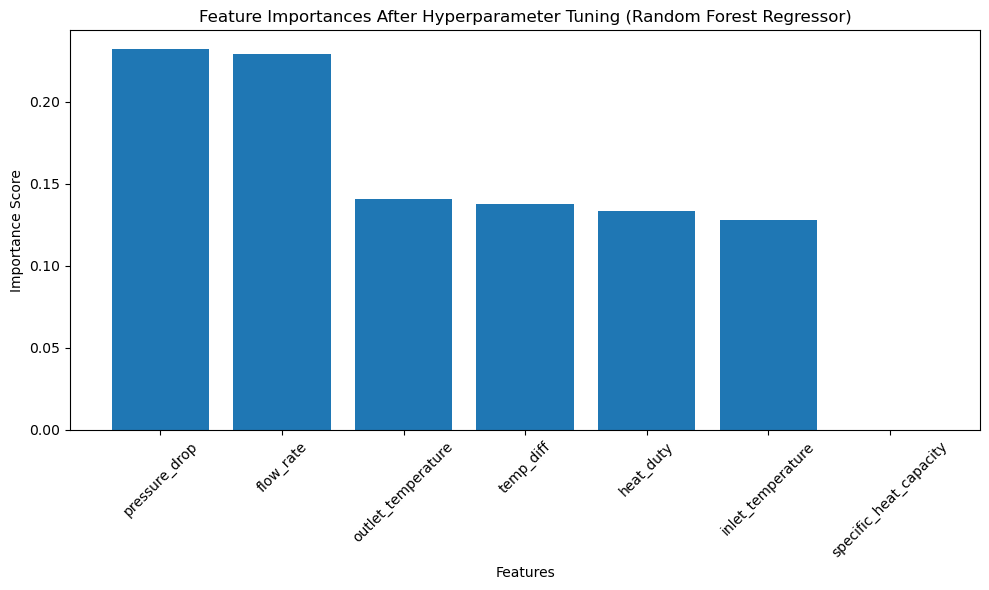

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the Dataset
data = pd.read_csv('/Users/ak261.1/Desktop/final-year-heat-exchanger/synthetic_heat_exchanger_data_expanded.csv')

# Step 2: Feature Engineering
# Create new features: temperature difference and heat duty
data['temp_diff'] = data['inlet_temperature'] - data['outlet_temperature']
data['heat_duty'] = data['flow_rate'] * data['specific_heat_capacity'] * data['temp_diff']

# Step 3: Define Features and Target for Regression
X = data.drop(columns=['fouling_factor'])
y = data['fouling_factor']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Hyperparameter Tuning for Random Forest Regressor
# Set up the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Apply GridSearchCV to Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_reg, param_grid=param_grid_rf, cv=3, n_jobs=-1, scoring='r2')
grid_search_rf.fit(X_train, y_train)

# Extract the best parameters and retrain the model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Print the results
print("\nBest Parameters for Random Forest Regressor:", grid_search_rf.best_params_)
print("Random Forest Regressor - MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest Regressor - R2 Score:", r2_score(y_test, y_pred_rf))

# Step 5: Visualize Feature Importances
# Extract feature importances from the best Random Forest Regressor model after hyperparameter tuning
feature_importances = best_rf_model.feature_importances_
features = X.columns

# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances After Hyperparameter Tuning (Random Forest Regressor)")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

warnings.filterwarnings('ignore')

# Step 1: Load the Dataset
data = pd.read_csv('/Users/ak261.1/Desktop/final-year-heat-exchanger/synthetic_heat_exchanger_data_expanded.csv')

# Step 2: Feature Engineering (Create additional features)
data['temp_diff'] = data['inlet_temperature'] - data['outlet_temperature']
data['heat_duty'] = data['flow_rate'] * data['specific_heat_capacity'] * data['temp_diff']

# Step 3: Create Classification Labels Based on Fouling Factor
conditions = []
for value in data['fouling_factor']:
    if value < 0.15:
        conditions.append('Healthy')
    elif 0.15 <= value < 0.20:
        conditions.append('Fouled')
    else:
        conditions.append('Malfunctioning')

# Add classification labels to the dataset
data['condition'] = conditions

# Step 4: Define Features and Target for Classification
X = data.drop(columns=['fouling_factor', 'condition'])
y = data['condition']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Initialize Classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Step 6: Train Each Model and Evaluate Performance
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} - Accuracy Score: {accuracy:.2f}")
    print(f"{model_name} - Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"{model_name} - Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")



Logistic Regression - Accuracy Score: 0.33
Logistic Regression - Classification Report:
                precision    recall  f1-score   support

        Fouled       0.00      0.00      0.00         9
       Healthy       0.40      0.33      0.36        12
Malfunctioning       0.35      0.67      0.46         9

      accuracy                           0.33        30
     macro avg       0.25      0.33      0.28        30
  weighted avg       0.27      0.33      0.28        30

Logistic Regression - Confusion Matrix:
[[0 5 4]
 [1 4 7]
 [2 1 6]]

Decision Tree - Accuracy Score: 0.30
Decision Tree - Classification Report:
                precision    recall  f1-score   support

        Fouled       0.22      0.22      0.22         9
       Healthy       0.44      0.33      0.38        12
Malfunctioning       0.25      0.33      0.29         9

      accuracy                           0.30        30
     macro avg       0.31      0.30      0.30        30
  weighted avg       0.32      0.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import warnings

warnings.filterwarnings('ignore')

# Step 1: Load the Dataset
data = pd.read_csv('/Users/ak261.1/Desktop/final-year-heat-exchanger/synthetic_heat_exchanger_data_expanded.csv')

# Step 2: Feature Engineering (Create additional features)
data['temp_diff'] = data['inlet_temperature'] - data['outlet_temperature']
data['heat_duty'] = data['flow_rate'] * data['specific_heat_capacity'] * data['temp_diff']

# Step 3: Create Classification Labels Based on Fouling Factor
conditions = []
for value in data['fouling_factor']:
    if value < 0.15:
        conditions.append('Healthy')
    elif 0.15 <= value < 0.20:
        conditions.append('Fouled')
    else:
        conditions.append('Malfunctioning')

# Add classification labels to the dataset
data['condition'] = conditions

# Step 4: Define Features and Target for Classification
X = data.drop(columns=['fouling_factor', 'condition'])
y = data['condition']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Hyperparameter Tuning for Classification Models

# Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)
print("\nLogistic Regression - Best Parameters:", grid_search_lr.best_params_)
print("Logistic Regression - Accuracy Score:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression - Classification Report:\n", classification_report(y_test, y_pred_lr))

# Decision Tree Classifier
param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)
print("\nDecision Tree Classifier - Best Parameters:", grid_search_dt.best_params_)
print("Decision Tree Classifier - Accuracy Score:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classifier - Classification Report:\n", classification_report(y_test, y_pred_dt))

# Random Forest Classifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
print("\nRandom Forest Classifier - Best Parameters:", grid_search_rf.best_params_)
print("Random Forest Classifier - Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classifier - Classification Report:\n", classification_report(y_test, y_pred_rf))

# Support Vector Classifier (SVM)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
best_svm_model = grid_search_svm.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)
print("\nSVM Classifier - Best Parameters:", grid_search_svm.best_params_)
print("SVM Classifier - Accuracy Score:", accuracy_score(y_test, y_pred_svm))
print("SVM Classifier - Classification Report:\n", classification_report(y_test, y_pred_svm))

# Gradient Boosting Classifier
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)
print("\nGradient Boosting Classifier - Best Parameters:", grid_search_gb.best_params_)
print("Gradient Boosting Classifier - Accuracy Score:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Classifier - Classification Report:\n", classification_report(y_test, y_pred_gb))



Logistic Regression - Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Logistic Regression - Accuracy Score: 0.36666666666666664
Logistic Regression - Classification Report:
                 precision    recall  f1-score   support

        Fouled       0.14      0.11      0.12         9
       Healthy       0.44      0.33      0.38        12
Malfunctioning       0.43      0.67      0.52         9

      accuracy                           0.37        30
     macro avg       0.34      0.37      0.34        30
  weighted avg       0.35      0.37      0.35        30



/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite


Decision Tree Classifier - Best Parameters: {'max_depth': 5, 'min_samples_split': 5}
Decision Tree Classifier - Accuracy Score: 0.26666666666666666
Decision Tree Classifier - Classification Report:
                 precision    recall  f1-score   support

        Fouled       0.00      0.00      0.00         9
       Healthy       0.40      0.33      0.36        12
Malfunctioning       0.24      0.44      0.31         9

      accuracy                           0.27        30
     macro avg       0.21      0.26      0.22        30
  weighted avg       0.23      0.27      0.24        30


Random Forest Classifier - Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Classifier - Accuracy Score: 0.16666666666666666
Random Forest Classifier - Classification Report:
                 precision    recall  f1-score   support

        Fouled       0.14      0.11      0.12         9
       Healthy       0.33      0.25      0.29        12
Malfunctioning

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

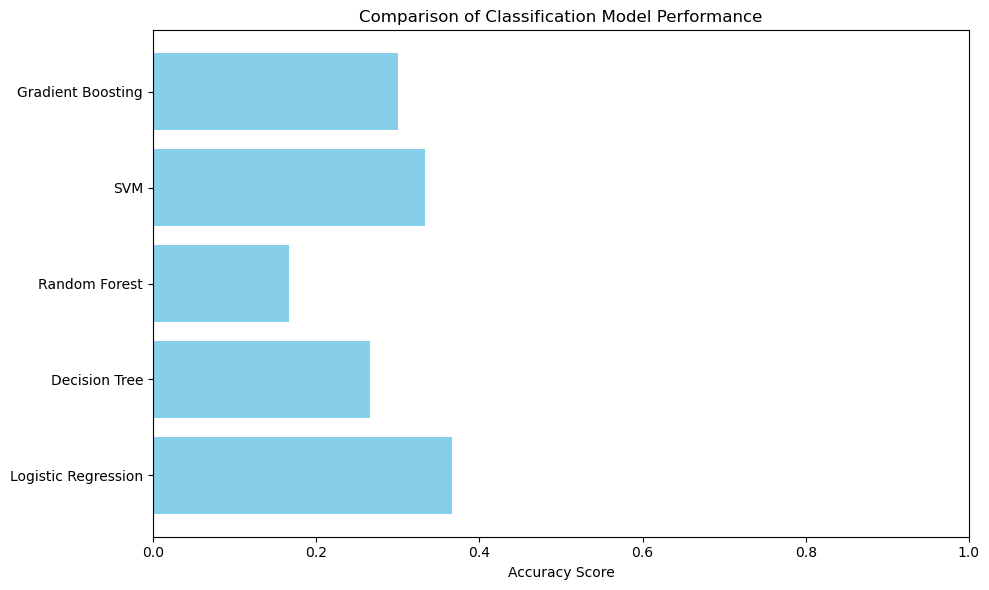

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Step 1: Load the Dataset
data = pd.read_csv('/Users/ak261.1/Desktop/final-year-heat-exchanger/synthetic_heat_exchanger_data_expanded.csv')

# Step 2: Feature Engineering (Create additional features)
data['temp_diff'] = data['inlet_temperature'] - data['outlet_temperature']
data['heat_duty'] = data['flow_rate'] * data['specific_heat_capacity'] * data['temp_diff']

# Step 3: Create Classification Labels Based on Fouling Factor
conditions = []
for value in data['fouling_factor']:
    if value < 0.15:
        conditions.append('Healthy')
    elif 0.15 <= value < 0.20:
        conditions.append('Fouled')
    else:
        conditions.append('Malfunctioning')

# Add classification labels to the dataset
data['condition'] = conditions

# Step 4: Define Features and Target for Classification
X = data.drop(columns=['fouling_factor', 'condition'])
y = data['condition']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train and Tune Different Classification Models

# Logistic Regression
param_grid_lr = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)

# Decision Tree Classifier
param_grid_dt = {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

# Random Forest Classifier
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Support Vector Classifier (SVM)
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
best_svm_model = grid_search_svm.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)

# Gradient Boosting Classifier
param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

# Step 6: Store Accuracy Scores for Visualization
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "Gradient Boosting"]
accuracy_scores = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_gb)
]

# Step 7: Plotting the Accuracy Scores for Each Model
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Accuracy Score')
plt.title('Comparison of Classification Model Performance')
plt.xlim(0, 1)  # Accuracy scores range from 0 to 1
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


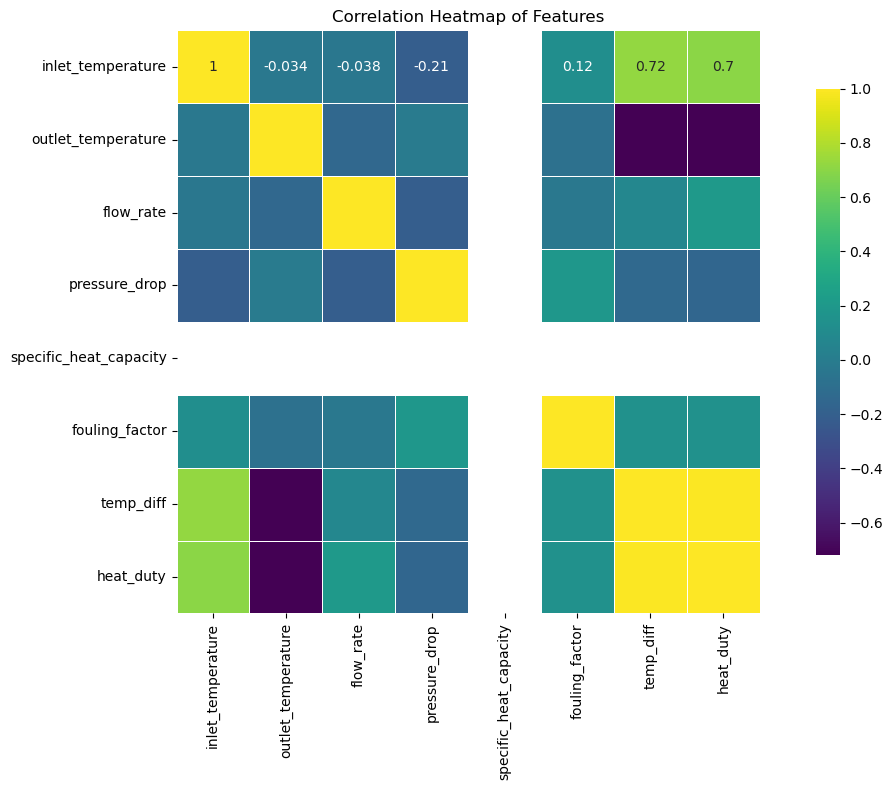

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the dataset to ensure it's in the correct format
data = pd.read_csv('/Users/ak261.1/Desktop/final-year-heat-exchanger/synthetic_heat_exchanger_data_expanded.csv')

# Create additional features
data['temp_diff'] = data['inlet_temperature'] - data['outlet_temperature']
data['heat_duty'] = data['flow_rate'] * data['specific_heat_capacity'] * data['temp_diff']

# Plotting a beautiful correlation heatmap with Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis', linewidths=0.5, linecolor='white', square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import warnings

warnings.filterwarnings('ignore')

# Step 1: Load the Dataset
data = pd.read_csv('/Users/ak261.1/Desktop/final-year-heat-exchanger/synthetic_heat_exchanger_data_expanded.csv')

# Step 2: Feature Engineering (Create additional features)
data['temp_diff'] = data['inlet_temperature'] - data['outlet_temperature']
data['heat_duty'] = data['flow_rate'] * data['specific_heat_capacity'] * data['temp_diff']

# Step 3: Create Classification Labels Based on Fouling Factor
conditions = []
for value in data['fouling_factor']:
    if value < 0.15:
        conditions.append('Healthy')
    elif 0.15 <= value < 0.20:
        conditions.append('Fouled')
    else:
        conditions.append('Malfunctioning')

# Add classification labels to the dataset
data['condition'] = conditions

# Step 4: Define Features and Target for Classification
X = data.drop(columns=['fouling_factor', 'condition'])
y = data['condition']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Scaling the Data and Hyperparameter Tuning for Logistic Regression

# Create a pipeline with StandardScaler and LogisticRegression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(max_iter=500))  # Increased max_iter to 500
])

# Define parameter grid for hyperparameter tuning
param_grid_lr = {
    'logistic__C': [0.1, 1, 10, 100],
    'logistic__solver': ['liblinear', 'lbfgs', 'saga']
}

# Apply GridSearchCV to Logistic Regression
grid_search_lr = GridSearchCV(pipe, param_grid_lr, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Extract the best parameters and retrain the model
best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)

# Print the results
print("\nLogistic Regression - Best Parameters:", grid_search_lr.best_params_)
print("Logistic Regression - Accuracy Score:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression - Classification Report:\n", classification_report(y_test, y_pred_lr))



Logistic Regression - Best Parameters: {'logistic__C': 0.1, 'logistic__solver': 'liblinear'}
Logistic Regression - Accuracy Score: 0.4
Logistic Regression - Classification Report:
                 precision    recall  f1-score   support

        Fouled       0.14      0.11      0.12         9
       Healthy       0.46      0.50      0.48        12
Malfunctioning       0.50      0.56      0.53         9

      accuracy                           0.40        30
     macro avg       0.37      0.39      0.38        30
  weighted avg       0.38      0.40      0.39        30



/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import warnings

warnings.filterwarnings('ignore')

# Step 1: Load the Dataset
data = pd.read_csv('/Users/ak261.1/Desktop/final-year-heat-exchanger/synthetic_heat_exchanger_data_expanded.csv')

# Step 2: Feature Engineering (Create additional features)
data['temp_diff'] = data['inlet_temperature'] - data['outlet_temperature']
data['heat_duty'] = data['flow_rate'] * data['specific_heat_capacity'] * data['temp_diff']

# Step 3: Create Classification Labels Based on Fouling Factor
conditions = []
for value in data['fouling_factor']:
    if value < 0.15:
        conditions.append('Healthy')
    elif 0.15 <= value < 0.20:
        conditions.append('Fouled')
    else:
        conditions.append('Malfunctioning')

# Add classification labels to the dataset
data['condition'] = conditions

# Step 4: Define Features and Target for Classification
X = data.drop(columns=['fouling_factor', 'condition'])
y = data['condition']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Scaling the Data with RobustScaler and Hyperparameter Tuning for Logistic Regression

# Create a pipeline with RobustScaler and LogisticRegression
pipe = Pipeline([
    ('scaler', RobustScaler()),  # Using RobustScaler to handle outliers
    ('logistic', LogisticRegression(max_iter=1000, solver='saga'))  # Increased max_iter to 1000 and used 'saga' solver
])

# Define parameter grid for hyperparameter tuning
param_grid_lr = {
    'logistic__C': [0.01, 0.1, 1, 10, 100]
}

# Apply GridSearchCV to Logistic Regression
grid_search_lr = GridSearchCV(pipe, param_grid_lr, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Extract the best parameters and retrain the model
best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)

# Print the results
print("\nLogistic Regression - Best Parameters:", grid_search_lr.best_params_)
print("Logistic Regression - Accuracy Score:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression - Classification Report:\n", classification_report(y_test, y_pred_lr))



Logistic Regression - Best Parameters: {'logistic__C': 0.01}
Logistic Regression - Accuracy Score: 0.3
Logistic Regression - Classification Report:
                 precision    recall  f1-score   support

        Fouled       0.00      0.00      0.00         9
       Healthy       0.00      0.00      0.00        12
Malfunctioning       0.30      1.00      0.46         9

      accuracy                           0.30        30
     macro avg       0.10      0.33      0.15        30
  weighted avg       0.09      0.30      0.14        30



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings

warnings.filterwarnings('ignore')

# Step 1: Load the Dataset
data = pd.read_csv('/Users/ak261.1/Desktop/final-year-heat-exchanger/synthetic_heat_exchanger_data_expanded.csv')

# Step 2: Feature Engineering (Create additional features)
data['temp_diff'] = data['inlet_temperature'] - data['outlet_temperature']
data['heat_duty'] = data['flow_rate'] * data['specific_heat_capacity'] * data['temp_diff']

# Step 3: Create Classification Labels Based on Fouling Factor
conditions = []
for value in data['fouling_factor']:
    if value < 0.15:
        conditions.append('Healthy')
    elif 0.15 <= value < 0.20:
        conditions.append('Fouled')
    else:
        conditions.append('Malfunctioning')

# Add classification labels to the dataset
data['condition'] = conditions

# Step 4: Define Features and Target for Classification
X = data.drop(columns=['fouling_factor', 'condition'])
y = data['condition']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Hyperparameter Tuning and Training Different Models

# Random Forest Classifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Print Random Forest results
print("\nRandom Forest Classifier - Best Parameters:", grid_search_rf.best_params_)
print("Random Forest Classifier - Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classifier - Classification Report:\n", classification_report(y_test, y_pred_rf))

# Gradient Boosting Classifier
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

# Print Gradient Boosting results
print("\nGradient Boosting Classifier - Best Parameters:", grid_search_gb.best_params_)
print("Gradient Boosting Classifier - Accuracy Score:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Classifier - Classification Report:\n", classification_report(y_test, y_pred_gb))



Random Forest Classifier - Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Classifier - Accuracy Score: 0.16666666666666666
Random Forest Classifier - Classification Report:
                 precision    recall  f1-score   support

        Fouled       0.14      0.11      0.12         9
       Healthy       0.33      0.25      0.29        12
Malfunctioning       0.07      0.11      0.09         9

      accuracy                           0.17        30
     macro avg       0.18      0.16      0.17        30
  weighted avg       0.20      0.17      0.18        30


Gradient Boosting Classifier - Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
Gradient Boosting Classifier - Accuracy Score: 0.3
Gradient Boosting Classifier - Classification Report:
                 precision    recall  f1-score   support

        Fouled       0.38      0.33      0.35         9
       Healthy       0.38      0.25      0.30        1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings

warnings.filterwarnings('ignore')

# Load the Dataset
data = pd.read_csv('synthetic_heat_exchanger_data_expanded.csv')

# Step 1: Feature Engineering (Create additional features)
data['temp_diff'] = data['inlet_temperature'] - data['outlet_temperature']
data['heat_duty'] = data['flow_rate'] * data['specific_heat_capacity'] * data['temp_diff']

# Step 2: Create Classification Labels Based on Fouling Factor
conditions = []
for value in data['fouling_factor']:
    if value < 0.15:
        conditions.append('Healthy')
    elif 0.15 <= value < 0.20:
        conditions.append('Fouled')
    else:
        conditions.append('Malfunctioning')

# Add classification labels to the dataset
data['condition'] = conditions

# Step 3: Define Features and Target for Regression and Classification
X = data.drop(columns=['fouling_factor', 'condition'])
y_reg = data['fouling_factor']
y_class = data['condition']

# Split the dataset into training and testing sets (80-20 Split)
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Step 4: Hyperparameter Tuning for Random Forest Regressor
param_grid_rf_reg = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Applying GridSearchCV to Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
grid_search_rf_reg = GridSearchCV(rf_reg, param_grid_rf_reg, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_search_rf_reg.fit(X_train, y_train_reg)

# Train the best Random Forest Regressor model
best_rf_reg = grid_search_rf_reg.best_estimator_
y_pred_reg = best_rf_reg.predict(X_test)

# Evaluate the Regression Model
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("\nBest Parameters for Random Forest Regressor:", grid_search_rf_reg.best_params_)
print("Regression Model Evaluation:")
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

# Step 5: Hyperparameter Tuning for Random Forest Classifier
param_grid_rf_class = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Applying GridSearchCV to Random Forest Classifier
rf_class = RandomForestClassifier(random_state=42)
grid_search_rf_class = GridSearchCV(rf_class, param_grid_rf_class, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_rf_class.fit(X_train_class, y_train_class)

# Train the best Random Forest Classifier model
best_rf_class = grid_search_rf_class.best_estimator_
y_pred_class = best_rf_class.predict(X_test_class)

# Evaluate the Classification Model
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class, average='weighted')
recall = recall_score(y_test_class, y_pred_class, average='weighted')
f1 = f1_score(y_test_class, y_pred_class, average='weighted')

print("\nBest Parameters for Random Forest Classifier:", grid_search_rf_class.best_params_)
print("Classification Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_class))

# Step 6: Cross-Validation for Classification
cross_val_scores_class = cross_val_score(best_rf_class, X, y_class, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cross_val_scores_class)
print("Mean Cross-Validation Accuracy:", cross_val_scores_class.mean())



Best Parameters for Random Forest Regressor: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Regression Model Evaluation:
Mean Absolute Error (MAE): 0.049418178093716264
R-squared (R²): -0.3341621281233331

Best Parameters for Random Forest Classifier: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Classification Model Evaluation:
Accuracy: 0.25
Precision: 0.27660714285714283
Recall: 0.25
F1-Score: 0.25986111111111115

Classification Report:
                 precision    recall  f1-score   support

        Fouled       0.20      0.25      0.22         4
       Healthy       0.43      0.33      0.38         9
Malfunctioning       0.12      0.14      0.13         7

      accuracy                           0.25        20
     macro avg       0.25      0.24      0.24        20
  weighted avg       0.28      0.25      0.26        20

Cross-Validation Accuracy Scores: [0.3  0.25 0.5  0.35 0.3 ]
Mean Cross-Validation Accuracy: 0.33999999999999997


In [ ]:
import joblib

# Assuming `best_rf_reg` is the trained RandomForestRegressor model
joblib.dump(best_rf_reg, 'best_rf_model.pkl')


['best_rf_model.pkl']

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import mean_absolute_error, r2_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor




In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('synthetic_heat_exchanger_data_expanded.csv')

# Add a 'condition' column based on fouling_factor thresholds
def classify_condition(factor):
    if factor < 0.15:
        return 'Low'
    elif 0.15 <= factor < 0.25:
        return 'Moderate'
    else:
        return 'Severe'

data['condition'] = data['fouling_factor'].apply(classify_condition)

# Features and targets
X = data[['inlet_temperature', 'outlet_temperature', 'flow_rate', 'pressure_drop']]
y_fouling = data['fouling_factor']
y_condition = data['condition']

# Split data into training and testing sets
X_train, X_test, y_fouling_train, y_fouling_test, y_condition_train, y_condition_test = train_test_split(
    X, y_fouling, y_condition, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a regression model for fouling factor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train_scaled, y_fouling_train)

# Train a classifier for condition
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_scaled, y_condition_train)

# Function to predict fouling factor and condition
def predict_fouling_and_condition(inlet_temperature, outlet_temperature, flow_rate, pressure_drop):
    """
    Predict the fouling factor and its condition based on input parameters.

    Args:
    - inlet_temperature (float): Inlet temperature of the heat exchanger.
    - outlet_temperature (float): Outlet temperature of the heat exchanger.
    - flow_rate (float): Flow rate of the fluid.
    - pressure_drop (float): Pressure drop across the heat exchanger.

    Returns:
    - fouling_factor (float): Predicted fouling factor.
    - condition (str): Predicted condition ('Low', 'Moderate', 'Severe').
    """
    # Prepare the input as a DataFrame
    input_data = pd.DataFrame({
        'inlet_temperature': [inlet_temperature],
        'outlet_temperature': [outlet_temperature],
        'flow_rate': [flow_rate],
        'pressure_drop': [pressure_drop]
    })

    # Scale the input using the fitted scaler
    input_scaled = scaler.transform(input_data)

    # Predict fouling factor
    fouling_factor = regressor.predict(input_scaled)[0]

    # Predict condition
    condition = classifier.predict(input_scaled)[0]

    return fouling_factor, condition

# Example usage
inlet_temp = 150
outlet_temp = 120
flow_rate = 100
pressure_drop = 5

fouling_factor, condition = predict_fouling_and_condition(inlet_temp, outlet_temp, flow_rate, pressure_drop)

print(f"Predicted Fouling Factor: {fouling_factor}")
print(f"Predicted Condition: {condition}")


Predicted Fouling Factor: 0.15898427956833042
Predicted Condition: Moderate


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('synthetic_heat_exchanger_data_expanded.csv')

# Add a 'condition' column based on fouling_factor thresholds
def classify_condition(factor):
    if factor < 0.15:
        return 'Low'
    elif 0.15 <= factor < 0.25:
        return 'Moderate'
    else:
        return 'Severe'

data['condition'] = data['fouling_factor'].apply(classify_condition)

# Features and targets
X = data[['inlet_temperature', 'outlet_temperature', 'flow_rate', 'pressure_drop']]
y_fouling = data['fouling_factor']
y_condition = data['condition']

# Split data into training and testing sets
X_train, X_test, y_fouling_train, y_fouling_test, y_condition_train, y_condition_test = train_test_split(
    X, y_fouling, y_condition, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a regression model for fouling factor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train_scaled, y_fouling_train)

# Train a classifier for condition
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_scaled, y_condition_train)

# Function to predict fouling factor and condition
def predict_fouling_and_condition(inlet_temperature, outlet_temperature, flow_rate, pressure_drop):
    """
    Predict the fouling factor and its condition based on input parameters.

    Args:
    - inlet_temperature (float): Inlet temperature of the heat exchanger.
    - outlet_temperature (float): Outlet temperature of the heat exchanger.
    - flow_rate (float): Flow rate of the fluid.
    - pressure_drop (float): Pressure drop across the heat exchanger.

    Returns:
    - fouling_factor (float): Predicted fouling factor.
    - condition (str): Predicted condition ('Low', 'Moderate', 'Severe').
    """
    # Prepare the input as a DataFrame
    input_data = pd.DataFrame({
        'inlet_temperature': [inlet_temperature],
        'outlet_temperature': [outlet_temperature],
        'flow_rate': [flow_rate],
        'pressure_drop': [pressure_drop]
    })

    # Scale the input using the fitted scaler
    input_scaled = scaler.transform(input_data)

    # Predict fouling factor
    fouling_factor = regressor.predict(input_scaled)[0]

    # Predict condition
    condition = classifier.predict(input_scaled)[0]

    return fouling_factor, condition

# Take input from the user
try:
    inlet_temp = float(input("Enter Inlet Temperature (°C): "))
    outlet_temp = float(input("Enter Outlet Temperature (°C): "))
    flow_rate = float(input("Enter Flow Rate (m³/h): "))
    pressure_drop = float(input("Enter Pressure Drop (bar): "))
    
    # Predict fouling factor and condition
    fouling_factor, condition = predict_fouling_and_condition(inlet_temp, outlet_temp, flow_rate, pressure_drop)

    print(f"\nPredicted Fouling Factor: {fouling_factor:.4f}")
    print(f"Predicted Condition: {condition}")
except ValueError:
    print("Invalid input! Please enter numeric values.")



Predicted Fouling Factor: 0.2000
Predicted Condition: Moderate
